# Introduction to Seaborn

The definition of seaborn's website is so concise that we replicate it here:

__"Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures."__

That's it! The main benefit of using it is that it is a more high-level library, which means we can achieve sophisticated plots with much less lines of code. Most axes style customization are done automatically. It can automatically provide plots with summary statistics.

In [1]:
import pandas as pd
import seaborn as sns

## Load data

Let's first load a dataframe.

In [2]:
df = pd.read_csv("../data/BBBC007_analysis.csv")
df.head()

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL


## Relational plots with seaborn

We will apply the seaborn default theme, but you can choose others [here](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles).

In [3]:
sns.set_theme()

We will start with a scatter plot of `aspect_ratio` vs. `intensity_mean`.

*Note: the scatter plot is the default relational plot, so that we don't need to provide `kind=scatter`.*

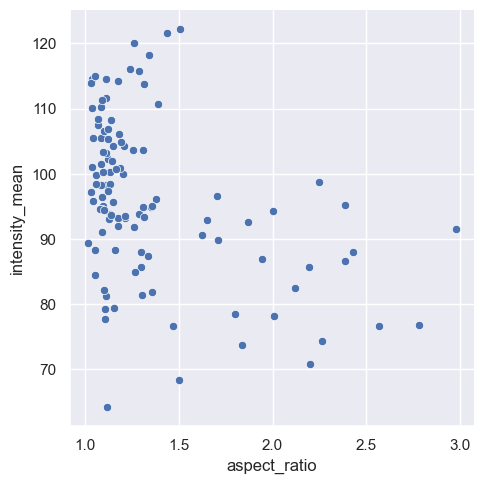

In [4]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean");

We can already embbed and visualize another feature by providing an extra argument: the size of the dots will be proportional to the variable `area`.

*Note: the legend is added automatically.*

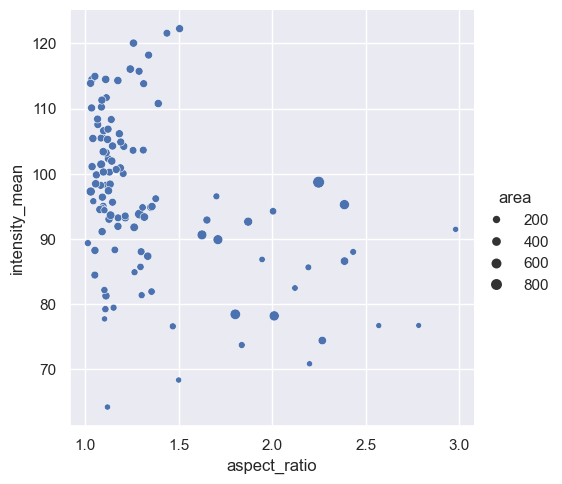

In [5]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean",
            size="area");

We can even embbed and visualize one more feature by providing another argument. Now the variable `major_axis_length` will be represented by a continuous color gradient. Four variables visualized in a 2D diagram!

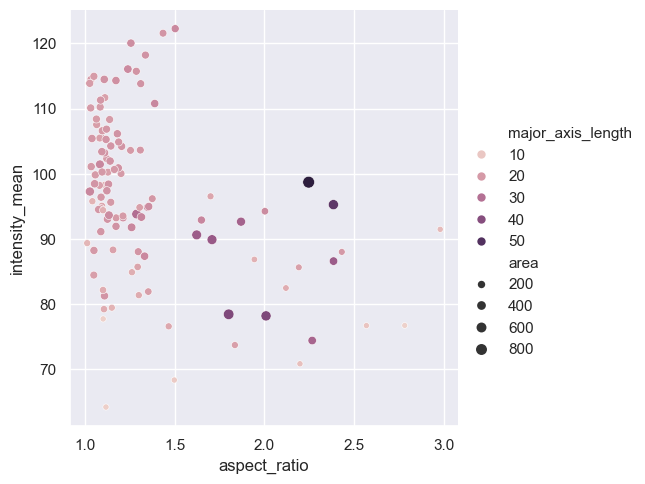

In [6]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean",
            size="area",
            hue="major_axis_length");

## Define subplots

The data in our DataFrame originate from two different images. The names of the images are contained in the column `file_name`. By passing `file_name` as the argument to the `col` parameter of `relplot`, Seaborn automatically divides the plot into two subplots.

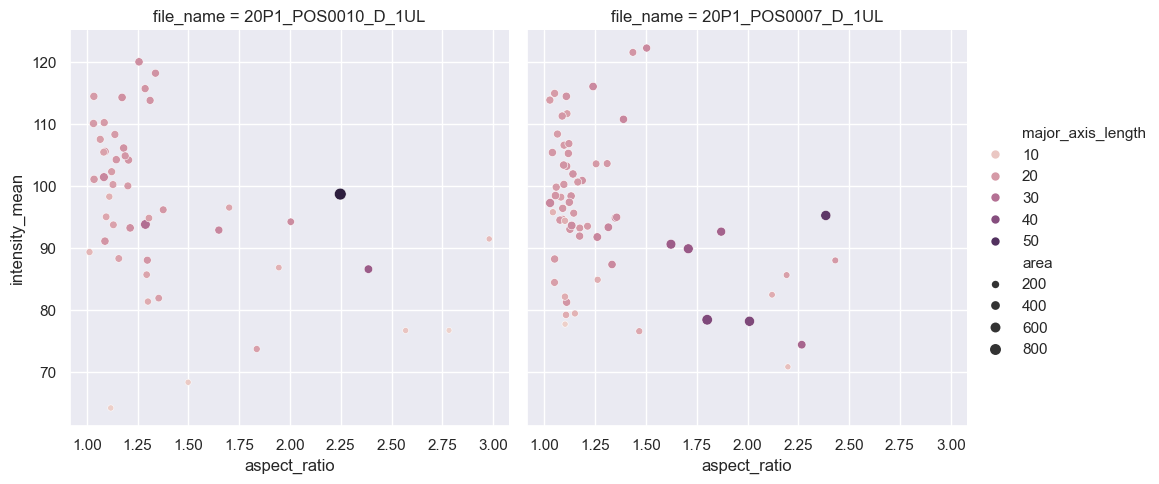

In [7]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean",
            size="area",
            hue="major_axis_length",
            col="file_name");

## Control the appearance of your plot

That's already quite neat, but a few things are missing. We would like to reduce its height and make it wider. Also the dots should have more contrast. For this, we will provide further arguments to the `relplot`function.

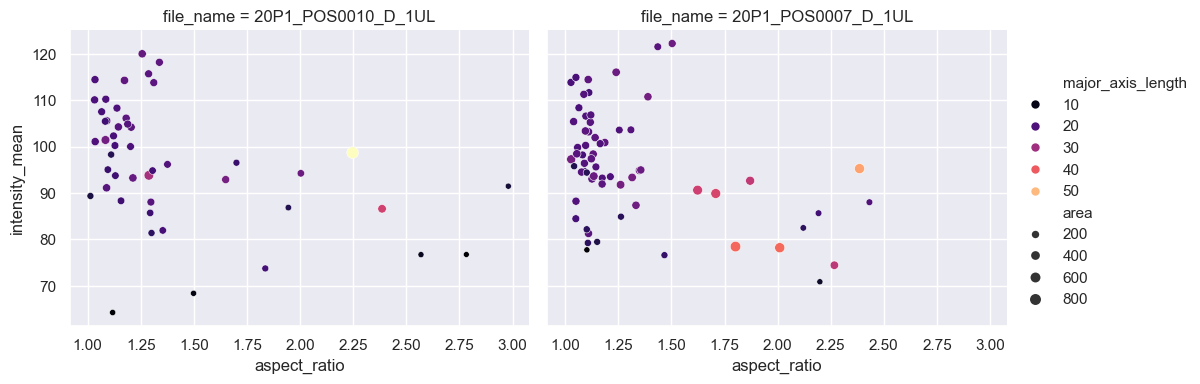

In [8]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean",
            size="area",
            hue="major_axis_length",
            col="file_name",
            height=4,
            aspect=1.3,
            palette="magma");

Further, we want to change the labels of the x and y axes give a title to the whole graph. To accomplish this, we will have Seaborn return a FacetGrid object, which we will refer to as `g`. This object allows us to control the appearance and layout of the plot.

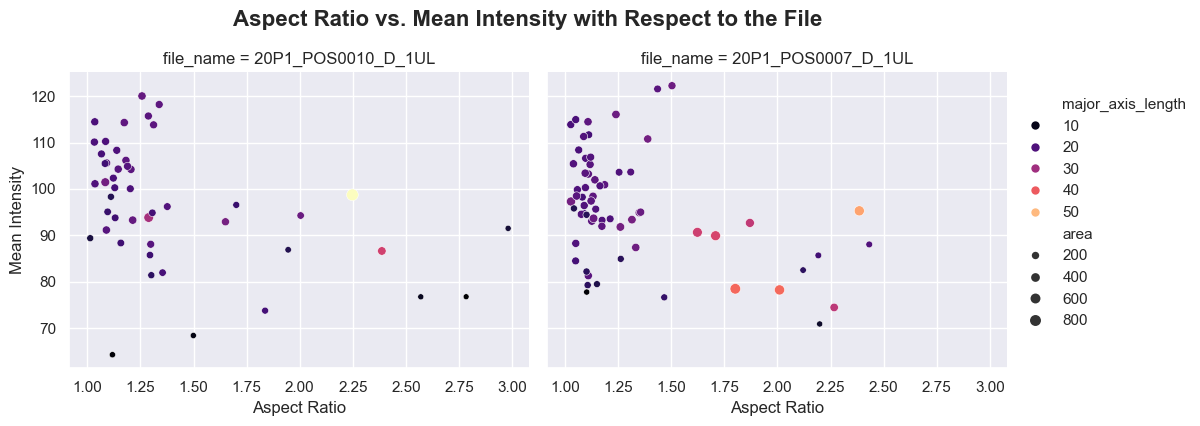

In [9]:
# Return object 'g'
g = sns.relplot(data=df,
                x="aspect_ratio",
                y="intensity_mean",
                size="area",
                hue="major_axis_length",
                col="file_name",
                height=4,
                aspect=1.3,
                palette="magma");

# Use 'g' to set the labels for x and y axes
g.set_xlabels("Aspect Ratio")
g.set_ylabels("Mean Intensity")

# Add a title
g.fig.suptitle("Aspect Ratio vs. Mean Intensity with Respect to the File",
               fontsize=16, fontweight="semibold",
               x=0.45, y=1.06);

## Plotting a line regression model

With [`sns.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html), you can draw a scatter plot with a line regression model. Let's observe the relationship between `major_axis_length` and `minor_axis_length` in each image.

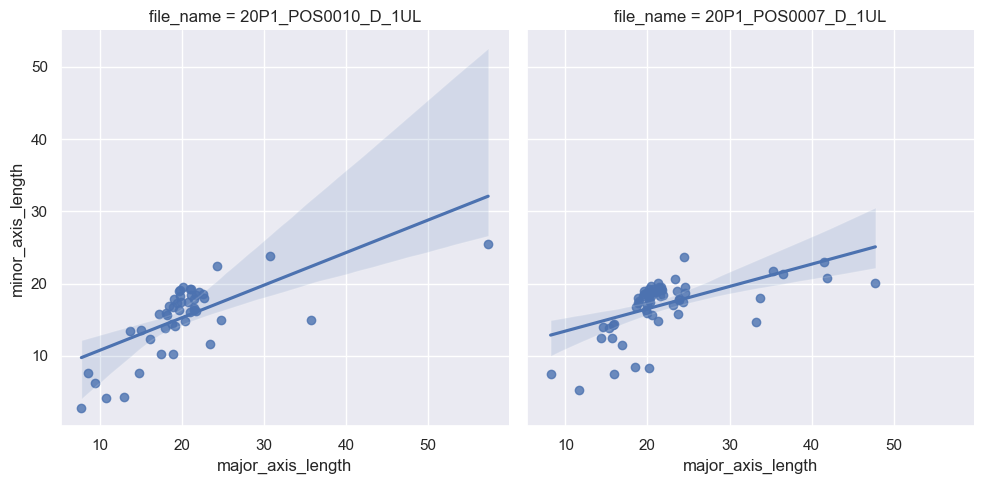

In [10]:
sns.lmplot(data = df,
           x = "major_axis_length",
           y = "minor_axis_length",
           col = "file_name");

## Exercise 1

Plot the same line regression model, but on a single plot, with points and lines having different colors according to `file_name`.

*Hint: use the hue argument in your function*

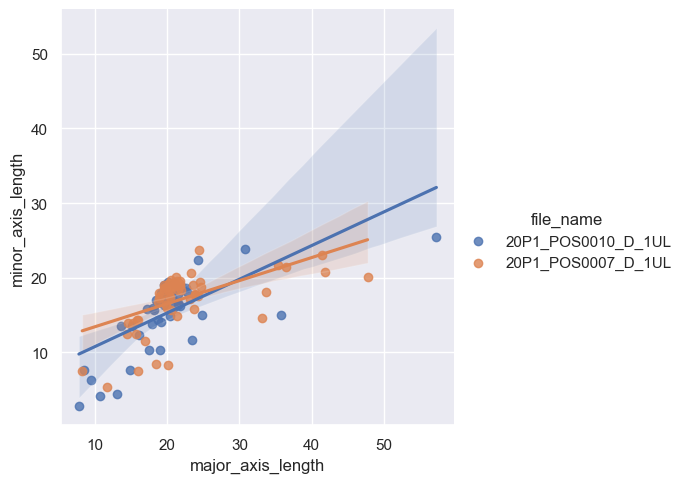

In [12]:
#''' SOLUTION
sns.lmplot(data = df,
           x = "major_axis_length",
           y = "minor_axis_length",
           hue = "file_name");
#'''

## Exercise 2

Until now, we have used the Seaborn default theme. Change the appearance of the above plot by customizing its theme with [`sns.set_theme()`](https://seaborn.pydata.org/generated/seaborn.set_theme.html) before you plot it. We want:
- a white background with a grid
- "serif" as a font family
- bright colors as a [`color_palette`](https://seaborn.pydata.org/tutorial/color_palettes.html)

Finally, give your plot a title and position it properly.

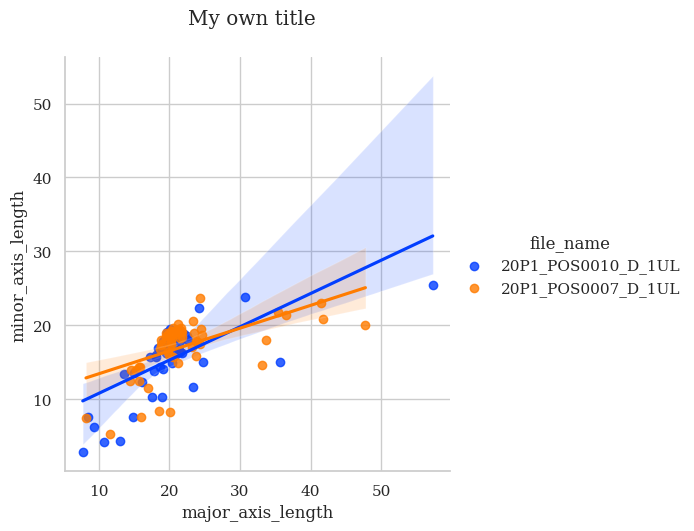

In [13]:
#''' SOLUTION
sns.set_theme(style="whitegrid", font="serif", palette="bright")

g = sns.lmplot(data = df,
               x = "major_axis_length",
               y = "minor_axis_length",
               hue = "file_name");

g.fig.suptitle("My own title",
               x=0.40, y=1.06);
#'''

In [23]:
sns.set_theme()